# Histogramas de color

### Importar librerias

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

### Función para mostrar imágenes

In [2]:
def mostrar_imagen(titulo, imagen):
  imagen = cv2.cvtColor(imagen,cv2.COLOR_BGR2RGB)
  plt.imshow(imagen)
  plt.title(titulo)
  plt.grid(False)
  plt.show()

Diccionario para establecer la imagen

In [3]:
args = {"imagen": "golden.jpeg"}

### Histograma de colores

Leer la imagen y mostrarla

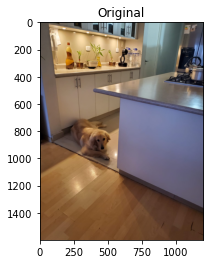

In [4]:
imagen = cv2.imread(args["imagen"])
mostrar_imagen("Original",imagen)

Separa los canales de la imagen e inicializa la tupla de colores y la figura

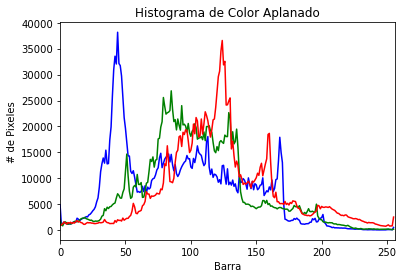

In [5]:
canales = cv2.split(imagen)
colores = ("b", "g", "r")

plt.figure()
plt.title("Histograma de Color Aplanado")
plt.xlabel("Barra")
plt.ylabel("# de Pixeles")

#Bucle sobre los canales de la imagen
for (canal, color) in zip(canales, colores):
    # Crea un histograma para el canal actual y lo dibuja
    hist = cv2.calcHist([canal], [0], None, [256], [0, 256])
    plt.plot(hist, color = color)
    plt.xlim([0, 256])

Histogramas 2D

Reduciendo el número de barras de 256 a 32 para visualizar mejor los resultados

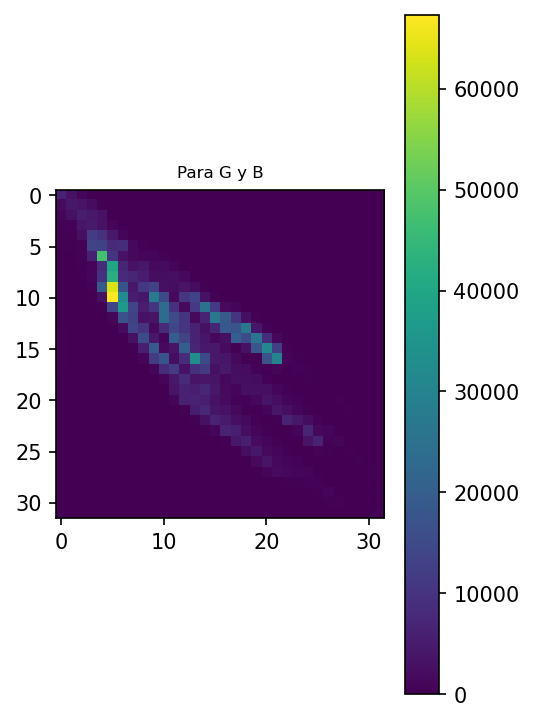

In [8]:
fig = plt.figure(figsize=(12, 6),dpi=150)

# Dibuja histograma de colores 2D para verde y azúl
ax = fig.add_subplot(131)
hist = cv2.calcHist([canales[1], canales[0]], [0, 1], None,
                    [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("Para G y B",fontsize=8)
plt.colorbar(p)

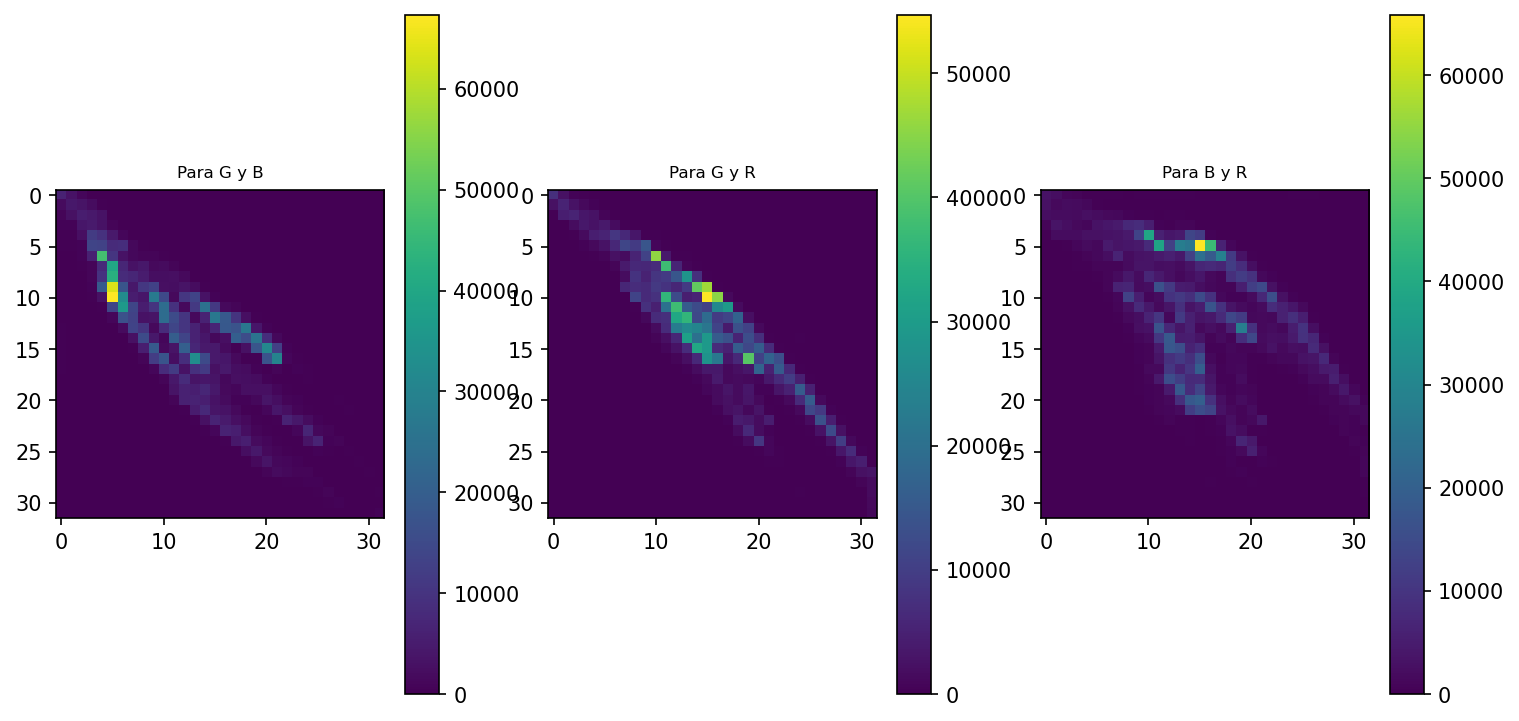

In [9]:
fig = plt.figure(figsize=(12, 6),dpi=150)

# Dibuja histograma de colores 2D para verde y azúl
ax = fig.add_subplot(131)
hist = cv2.calcHist([canales[1], canales[0]], [0, 1], None,
                    [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("Para G y B",fontsize=8)
plt.colorbar(p)

# Dibuja histograma de colores 2D para verde y rojo
ax = fig.add_subplot(132)
hist = cv2.calcHist([canales[1], canales[2]], [0, 1], None,
                    [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("Para G y R",fontsize=8)
plt.colorbar(p)

# Dibuja histograma de colores 2D para azúl y rojo
ax = fig.add_subplot(133)
hist = cv2.calcHist([canales[0], canales[2]], [0, 1], None,
                    [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("Para B y R",fontsize=8)
plt.colorbar(p)
plt.show()

Finalmente, examinemos la dimensionalidad de uno de los histogramas 2D

In [10]:
print("Forma del histograma 2D: {}, con {} valores".
      format(hist.shape,hist.flatten().shape[0]))

Forma del histograma 2D: (32, 32), con 1024 valores


Nuestro histograma 2D solo podría tener en cuenta 2 de los 3 canales en la imagen, así que ahora construyamos un histograma de color 3D (utilizando todos los canales) con 8 contenedores en cada dirección; no podemos trazar el histograma 3D, pero la teoría es exactamente como el de un histograma 2D, por lo que solo mostraremos la forma del histograma

In [11]:
hist = cv2.calcHist([imagen], [0, 1, 2],
                    None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
print("Forma del histograma 3D: {}, con {} valores".
      format(hist.shape, hist.flatten().shape[0]))

Forma del histograma 3D: (8, 8, 8), con 512 valores
